<img   src="../figuras/logo/TalentQ_LogoPosNegro.png" align=center  width="120"/>
<br>

<table width="100%">
<td style="font-size:50px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
Operadores
</td></table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\V}{{\cal V}} $



- [Operadores, Matriz, Adjunto](#opdefi) 

- [Producto Exterior de Vectores](#prodext)

- [Clases de operadores](#optipos)



In [1]:
%run ../macro_CURSO.py

<a id='opdefi'></a>
<table width="100%">
    <td style="font-size:25px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Operadores</b>
</table>   

En un espacio vectorial, además de los vectores, será esencial entender la manera en que estos se pueden transformar entre sí. Esto es la teoría de operadores

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b> Definición: </b> Un operador lineal es una aplicación  que transforma un vector  en otro 
<br>
<br>
$$
A: \ket{u} ~~\to ~~ \ket{v}  
$$
<p>
</div>

- escribimos también $\ket{v} = A\ket{u}$.
<br>

- *lineal* implica que, sobre una *combinación lineal* de vectores, actúa de forma lineal, es decir: 

<br>
$$
A: (\alpha\ket{u} + \beta\ket{w})~~\to ~~ \ket{v} =\alpha ( A\ket{u}) + \beta (A\ket{w})
$$


<div class="alert alert-block alert-warning">
    <b>Ejemplo:</b> 
<br>    el operador más fácil de visualizar es el operador de <i>rotación en un plano</i>. Dado un ángulo $\theta \in (0,2\pi)$ el operador $A = R(\theta)$ gira cualquier vector un ángulo $\theta$ en el sentido antihorario
<br>
Representar el vector  $\ket{u} = (u_1,u_2)$  es equivalente a representar el número complejo $u = u_1 + i u_2$ en el plano complejo.
  Escrito en polares, $u=|u|e^{i\phi}$, y sabemos que una rotación de ángulo $\theta$ es equivalente a añadirle dicho  ángulo a la fase 
<br>
$$
 v = R(\theta) u = |u| e^{i(\phi + \theta)} =  |u| e^{i\phi } e^{i\theta} = u\cdot e^{i\theta} 
$$
<br>    
Por tanto, para rotar un número complejo un ángulo $\theta$ basta con multiplicarlo por la fase $e^{i\theta}$, que se corresponde con el operador $R(\theta)$ en el espacio vectorial $\mathbb{H}\equiv\mathbb{C}^2$.   
La propiedad fundamental de una rotación es la de mantener invariante el módulo  $|v| = |u|$.    
</div>


<div class="alert alert-block alert-danger">
<b>Nota:</b>
<br>    
No nos preocupa el <i>mecanismo</i> mediante la cuál cual un operador  <i>transforma un vector en otro</i> $A\ket{u} =\ket{v}$. Es una construcción mental matemática. 
Cuando querramos implementar la computación cuántica en un ordenador cuántico, constuiremos el operador $A$ a partir del control de los procesos de evolución físicos que puedan ocurrir en el mismo.
</div>

u= u1 + i u2 =  (2+2j)
v= v1 + i v2 =  (0.52+2.78j)


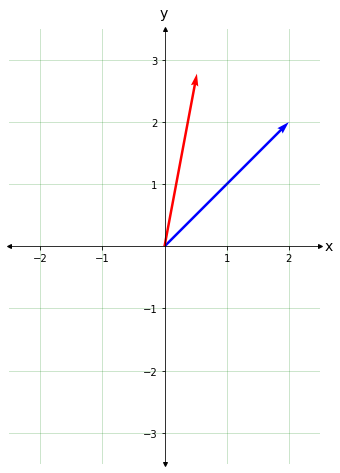

In [4]:
'''ángulo que queremos rotar'''
theta=0.6 

'''vector a rotar'''
u1=2.
u2=2.
u = u1 + u2*1j
print('u= u1 + i u2 = ',np.round(u,2))

'''rotación'''
v = u*np.exp(1j*theta) # z rotado un angulo theta
print('v= v1 + i v2 = ',np.round(v,2))

''' Representación en el plano complejo '''
plot_2D_plane(left=-int(abs(v.real))-2,right=int(abs(v.real))+2,up=int(abs(v.imag))+1,down=-int(abs(v.imag))-1)
draw_vector(u.real,u.imag,vcolor='b')
draw_vector(v.real,v.imag,vcolor='r')


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
Utilizando la intuición anterior, define una función $R$, que recibe un vector de dos componentes $(u_1,u_2)$ y devuelve el vector $(v_1,v_2)$ de componentes rotadas un ángulo $\theta$.
</div>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
Repite los pasos de esta sección para el caso en el que $v= u*re^{i\theta}$, es decir, multiplicamos el número complejo 
$u$ por un número complejo arbitrario de módulo $r$. Después de leer la siguiente sección, escribe la matriz $A_{ij}$ asociada a este operador. 
</div>

### Matriz de un operador

Dada una base, un vector queda especificado por una colección de números, sus componentes.

Vamos a ver que, igualmente, un operador queda definido por una matriz numérica. 

Efectivamente, en una base, la relación $\ket{v} = A\ket{u}$ equivale a una ecuación que relacione las componentes de ambos vectores


$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} \hspace{4cm}
$$
<br>
La propiedad de linealidad es evidente porque la acción de una matriz sobre una suma de vectores columna es igual a la suma de las acciones sobre cada vector.

Para $N$ arbitrariamente grande es preferible usar la notación de índices

$$
v_i = \sum_{j=1}^N A_{ij} u_j  \, .
$$



La suma en la expresión anterior es equivalente a la regla de multiplicación de matrices 

<br>

$$
\begin{pmatrix}
v_1 \\ v_2 \\ \vdots \\ v_N \end{pmatrix} =  \begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}
 \begin{pmatrix} 
u_1 \\ u_2 \\ \vdots \\ u_N\end{pmatrix} \hspace{4cm}
$$

<div class="alert alert-block alert-warning">
    <b>Ejemplo:</b> 
<br>    Continuando con el ejemplo del operador de rotación en un plano, hemos visto que las componentes de $u = u_1 + i u_2$ y las de $R(\theta)u = v = v_1 + i v_2$ se obtienen mediante la multiplicación por una fase pura 
\begin{eqnarray}
v&=& u e^{i\theta} \\
\end{eqnarray}
    
Vamos a desarrollar cada miembro en cartesianas, separando las partes real e imaginaria
<br>    
\begin{eqnarray}
v_1 + i v_2 &=& (u_1 + iu_2) (\cos \theta + i \sin \theta)  \\
    \rule{0mm}{6mm}
    &=& (\cos\theta \, u_1 - \sin \theta\,  u_2) + i(\sin\theta\,  u_1 + \cos \theta\,  u_2)
\end{eqnarray}
<br>
    
es decir las coordenadas del vector origen y el vector rotado imagen se relacionan en la  forma 

<br>
\begin{eqnarray}
v_1 = \cos\theta \, u_1 - \sin \theta\,  u_2 ~~~~~~~,~~~~~~~~
v_2 = \sin\theta \, u_1 + \cos \theta\,  u_2     
\end{eqnarray}
<br>

que podemos expresar en forma matricial
    
$$
\begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = \begin{pmatrix} \cos\theta & -\sin\theta \\ \sin\theta &\cos\theta\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}
$$    
    
  
    
    
</div>


<a id='prodext'></a>
<table width="100%">
    <td style="font-size:25px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Producto Exterior de Vectores</b>
</table>   

Consideremos dos vectores $\ket{u} = \sum_i u_i\ket{e_i}$ y $\ket{v} = \sum_j v_j \ket{e_j}$, expresados en una base ortonormal. Dependiendo del orden en que los compongamos, $\braket{u}{v}$ o $\ket{v}\bra{u}$, el resultado produce dos cantidades muy distintas.
<br>

- El *producto interno*, o *producto escalar* es un **número complejo**
<br>

$$
 a = \braket{u}{v} = \braket{v}{u}^* 
$$


- El *producto externo* es un **operador**
<br>
$$
A = \ket{v}\bra{u}
$$
<br>

Para comprender por qué es un operador, observamos que dicha expresión está <i>a la espera </i> de un vector $\ket{w}$ para dar otro
<br><br>

$$
A : \ket{w} ~\to ~ A\ket{w} =  \ket{v}\braket{u}{w}=\ket{v} b  = b \ket{v} 
$$
<br>

donde el número complejo $b=\braket{u}{w}$ es  la *proyección* de $\ket{w}$ en la dirección de $\ket{u}$.

<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>
1.     El <i>orden</i> en que escribimos las cosas es <b>muy</b> relevante.
<br>    
$\Rightarrow$ 
$\braket{u}{v}$ y $\ket{v}\bra{u}$ son objetos <i> radicalmente distintos</i> (el primero es un número y el segundo un operador). 
<br>  
<br>    
$\Rightarrow$  En cambio $\ket{v} b  = b \ket{v}$, así como $\bra{u}b = b\bra{u}$, es decir,  los números complejos y los $kets$ o $bras$ pueden escribirse en cualquier orden (decimos que conmutan).
<br>
<br>
2.    La acción del operador  $A = \ket{v}\bra{u}$ es muy fácil de expresar con palabras: 
el operador $A$ toma <i>cualquier vector</i> $\ket{w}$ y lo convierte en un vector <i>paralelo</i> a $\ket{v}$ proporcionalmente a su proyección $b=\braket{u}{w}$. Si la proyección es nula $b=0$, el operador <i>aniquila</i>, es decir, da el elemento neutro.
<div>

***

### En componentes

La diferencia entre el *producto interno* $a=\braket{u}{v}$ y el *externo* $A=\ket{u}\bra{v}$ tiene su reflejo en una base expresando ambos vectores en componentes. Sea $\ket{u} = \sum_i u_i\ket{i}$ y $\ket{v} = \sum_j v_j \ket{j}$ 

-  el *número complejo* $a$ que expresa el *producto escalar*
$$
 a = \braket{u}{v}  = \begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix}
\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}\, =  \sum_i u_i^*v_i
$$

-  la matriz $A_{ij}$ que expresa  representa el operador $A$ en la base $\{\ket{i}=\ket{e_i}\}$

$$
A = \ket{v}\bra{u} ~\sim ~\begin{pmatrix} v_1 \\ \vdots \\ v_N\end{pmatrix}
\begin{pmatrix} u_1^*,...,u_N^*\end{pmatrix} ~=~ 
\begin{pmatrix} v_1 u_1^* & v_1u_2^* & ... & v_1 u_N^* \\
v_2 u_1^* & v_2 u_1^*& ... & v_2 u_N^* \\ \vdots & \vdots  & \ddots & \vdots \\
v_N u_1^* & & ... & v_N u_N^* \end{pmatrix} ~ = ~A_{ij}
$$

<br>

***

### Base canónica de operadores

Un caso importante es cuando $A$ es el producto externo de dos vectores de la base $\ket{i}$ y $\ket{j}$ 
<br><br>
$$A = \ket{i}\bra{j}$$
<br>

- La acción de $A$ sobre un vector $\ket{e_k}$ arbitrario de la base es sencilla:  cambia el vector $\ket{e_j}\to \ket{e_i}$ y aniquila a todos los demás
<br>

$$
A \ket{k} = \ket{i}\braket{j}{k} = \ket{i} \delta_{jk} = \left\{ \begin{array}{rl}
0 & {\rm if} ~~k\neq j \\ \ket{i} & {\rm if} ~~ k=j \end{array} \right.
$$

- La matriz asociada al operador  tiene sólo un 1 en el elemento $(ij)$ y cero en todos los demás. Por ejemplo, supongamos que 
$N=4$ 

<br>

$$
\ket{e_2}\bra{e_3} ~\to ~~
 \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\begin{pmatrix} 0 & 0 & 1 & 0 \end{pmatrix} = 
\begin{pmatrix}
0 &  0 & 0 &  0 \\  0 &  0 & 1&  0 \\ 0 &  0 & 0 &  0 \\ 0 &  0 & 0 &  0
\end{pmatrix} ~~\Rightarrow ~~ A_{ij} = \delta_{i2}\delta_{j3}
$$

<br>

### Expansión de un operador general

Ahora podemos obtener una nueva perspectiva sobre la matriz $A_{ij}$ asociada a un operador $A$. 

De la misma manera que las componentes $u_i$ expresan la *expansión de un vector* $\ket{u}$ en una *base ortonormal de vectores*,  $\to \ket{u} = \sum_{i=1}^N u_i \ket{i}$, los *elementos de matriz* $A_{ij}$ expresan la *expansión de un operador* en una **base de operadores** $\ket{i}\bra{j}$
<br>
Escribiendo las matrices asociadas a $\ket{i}\bra{j}$, es evidente que $\sum_{i,j=1}^N A_{ij} \ket{i}\bra{j} $ reconstruye la mariz $A_{ij}$ asociada a $A$
<br>
<br>
$$
A= \sum_{i,j=1}^N A_{ij} \ket{i}\bra{j} \,~~~~ \Longleftrightarrow ~~~~
\begin{pmatrix} 
A_{11} & A_{12} & \cdots & A_{1N} \\
A_{21} & A_{22} & \cdots & A_{2N} \\
\vdots & \vdots &  \ddots      & \vdots \\
A_{N1} & A_{N2} &    \cdots    & A_{NN}
\end{pmatrix}. \hspace{2cm}
$$

<details>
<summary><p style="text-align:right"> >> Consistencia </p></summary>

Verifiquemos que actúa de la forma correcta

$$
\begin{array}{rcl}
A |u\rangle &=&  \sum_{i,j} A_{ij} | i\rangle \langle j | \left(\sum_k u_k |e_k\rangle \right) \\
&\stackrel{\rm linealidad}{=}& \sum_{i,j} \sum_k A_{ij} | e_i\rangle  \,   u_k \langle e_j| e_k\rangle \nonumber\\
&\stackrel{\rm ortonormalidad}{=}& \sum_{i,j,k} A_{ij} | e_i\rangle  \,   u_k \delta_{jk}\\
&=&\sum_{ij} A_{ij}\,|e_i\rangle \, u_j= \sum_i \left(\sum_{j} A_{ij}\, u_j\right)  |e_i\rangle    \\
&=&\sum_i v_i \ket{e_i} \nonumber\\
&=&   | v\rangle
\end{array}
$$
</details>

### Elementos de matriz

Podemos invertir la expresión anterior para obtener, a partir de un operador, $A$, sus *elementos de matriz*

$$\fbox{$ A_{ij} = \bra{i} A \ket{j}$} $$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
demuestra esta expresión
<details>
<summary><p style="text-align:right"> >> Solución </p></summary>
\begin{eqnarray}
\bra{e_i} A \ket{e_j} &=&  \bra{i}\left(\sum_{k,l=1}^N A_{kl} \ket{k}\bra{l}  \right) \ket{j}\nonumber\\
    &=&\sum_{k,l=1}^N \braket{e_i}{k} A_{kl} \braket{l}{j} \nonumber\\
    &=&\sum_{k,l=1}^N \delta_{ik} A_{kl} \delta_{lj} = A_{ij}
\end{eqnarray}
</details>    


### Relación de completitud    
    
el operador identidad $I$ tiene por matriz $I_{ij}=\delta_{ij}={\rm diagonal}\, (1,1,...,1)$ con lo que

<br>

$$
I = \sum_{ij} \delta_{ij}\ket{i}\bra{j} = \sum_{i}  \ket{i}\bra{i}
$$

Esta expresión se conoce también como <b>relación de completitud</b> o, también <b>relación de cierre</b> y se utiliza muy frecuentemente.


<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>
la relación de completitud es, en realidad, una propiedad de  <b> cualquier base</b>. Dicho de otro modo, si $\{\ket{e_i}\}$ y $\{\ket{f_i}\}$ son, ambas, bases entonces 
<br>
<br>
$$
I =  \sum_{i}  \ket{e_i}\bra{e_i} =  \sum_{j}  \ket{f_j}\bra{f_j}\, .
$$
</div>


La relación de cierre, o completitud,  siempre se puede insertar en cualquier momento del cálculo. Se utiliza con frecuencia para efectuar cambios de base.
<br>
<br>
Por ejemplo, sean
dos vectores $\ket{u}$ y  $\ket{v}$. Vamos a ver que su producto escalar puede calcularse en cualquier base  usando la relación de completitud en dicha base $I = \sum_i \ket{f_i}\bra{f_i}$    
<br>
$$ 
\braket{v}{u} = \bra{v} I \ket{u} = \bra{v}\left(\sum_i\ket{f_i}\bra{f_i}\right)\ket{u} = 
\sum_i \braket{v}{f_i}\braket{f_i}{u} = \sum_i v_i^* u_i
$$ 
<br>
donde $\ket{u} = \sum_i u_i\ket{f_i}$  y $\ket{v} = \sum_i v_i\ket{f_i}$ en dicha base.  


<div class="alert alert-block alert-warning">
<b>Resumen:</b> 
<br>     
Dada una base $\{\ket{e_i}\}$ podemos expresar un operador mediante una matriz $A_{ij}$. La relación concreta es 

- como operador $$ A = \sum_{ij} A_{ij}\ket{i}\bra{j}$$

- como matriz $$ A_{ij} = \bra{i}A\ket{j}$$
<br>   
</div>    

<a id='funcope'></a>
<table width="100%">
    <td style="font-size:25px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Funciones de operadores</b>
</table>   

## Conmutador 

A diferencia de los números, el orden en el que se componen dos operadores es relevante.  
Dados dos operadores, $A$ y $B$, definimos el *conmutador*  

\begin{eqnarray}
 [A,B] = AB-BA\,  \nonumber
\end{eqnarray}

El conmutador es otro operador que, en general, no es cero.

- El conmutador tiene las dos siguientes propiedades algebraicas, elementales de probar

\begin{eqnarray}
{\rm Derivación} ~~~& \to & ~ [A,BC] = B[A,C] + [A,B]C \nonumber\\ \rule{0mm}{5mm}
{\rm Identidad \ de \, Jacobi}~~~~ & \to & ~ [A,[B,C]] + [B,[C,A]] + [C,[A,B]] = 0 
\end{eqnarray}


- La conmutatividad de dos operadores $[A,B]=0$ es una propiedad algebráica muy deseable que, cuando se da, implica propiedades  muy ventajosas. 

## Traza de un operador

La traza de un operador se define como la suma de los elementos diagonales de la matriz que lo representa en una base

$$
{\rm tr} A \equiv \sum_{i} A_{ii} =   \sum_{i} \bra{i}A\ket{i} 
$$



La traza de $A$ es *independiente de la base* (por eso decimos que es *del operador*)

\begin{eqnarray}
{\rm tr} A &=& \sum_{i} \bra{i}A\ket{i} =\sum_{i} \bra{i}A\sum_j\ket{\tilde j}\braket{\tilde j}{i}
\nonumber\\
&=& \sum_{j} \bra{\tilde j}\sum_i\ket{i}\bra{i} A \ket{\tilde j}\nonumber\\
&=& \sum_{j} \bra{\tilde j}A\ket{\tilde j}\nonumber\\
&=& \sum_j \tilde A_{jj}
\end{eqnarray}


La traza de un producto de operadores tiene la propiedad de *cíclicidad*: es invariante bajo permutaciones cíclicas de los operadores en su argumento. Por ejemplo, para tres operadores $A, B$ y $C$

$$
{\rm tr}(ABC)= {\rm tr}(BCA) 
$$

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>$~$
demuestra este resultado
<details>
<summary><p style="text-align:right"> >> Solución </p></summary>
\begin{eqnarray}
{\rm tr}(ABC)&=& \sum_{i,j,k}A_{ij}B_{jk}C_{ki} =\sum_{j,k,i}B_{jk}C_{ki}A_{ij}={\rm tr}(BCA) \end{eqnarray}
</details>    


Para un producto de dos operadores, el anterior resultado implica que la *traza de un conmutador es cero*. Dicho de otra forma

$$
{\rm tr}(AB) = {\rm tr}(BA) ~~~\Rightarrow ~~~~{\rm tr}([A,B]) = 0 \, .
$$

## Funciones analíticas

Estamos acostumbrados a escribir funciones de una variable real o compleja. Por ejemplo $x\to f(x)= x^2$, o $z\to f(z) = e^z$. 

Querríamos dar sentido a una función de un operador 
$$
A \to f(A)
$$

En el caso de que $f(z)$ sea una función analítica expresable como una serie de Taylor en torno a $x=0$ 

$$
f(z) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  z^n
$$

tomaremos como definición la misma serie cambiando el argumento $x\to A$

$$
f(A) = \sum_{n=0}^\infty \frac{1}{n!} f^{(n)}(0)\,  A^n
$$

Por ejemplo, la exponencial de un operador sera

$$
\exp(A) = I + A + \frac{1}{2} A^2 + \frac{1}{3!} A^3 + ...
$$

Para el caso en que $f(z)$ sea una función no analítica daremos para $f(A)$ una expresión más general en el capítulo siguiente.



<div class="alert alert-block alert-danger">
<b>Notar:</b> 
<br>
De la misma forma que, para funciones analíticas $f(z)^* = f(z^*)$, también la definición anterior asegura que 
$f(A)^\dagger = f(A^\dagger)$
</div>

<a id='prodext'></a>
<table width="100%">
    <td style="font-size:25px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Espacio Vectorial  ${\rm L}(\Hil)$ </b>
</table>   

Pensemos en el <i>conjunto</i> de **todos** <i>los operadores lineales</i> sobre un espacio vectorial $\Hil$. Podemos ver que este conjunto tiene, de forma natural, una estructura de espacio vectorial. 

En efecto, sean $A$ y $B$ dos operadores, y $\lambda\in {\bf C}$ un número complejo entonces tanto la suma $C = A+B$ como la multiplicación externa $D=\lambda A$ son nuevos operadores definidos por su acción sobre un vector cualquiera $\ket{v}\in \Hil$


<br>
$$
C\ket{v} ~=~ (A + B) \ket{v} = A\ket{v} + B\ket{v}
$$
<br>
$$
D\ket{v} ~=~ (\lambda A) \ket{v} = \lambda (A\ket{v})
$$


Esto quiere decir que los operadores lineal sobre $\Hil$ forman, ellos mismos, un espacio vectorial que recibe el nombre de ${\rm Lin}(\Hil)$.

## Operador Adjunto

La conjugación adjunta se puede extender a ${\rm Lin}(\Hil)$
<br><br>

$$
\dagger ~\to ~
\left\{
\begin{matrix}
z & \leftrightarrow  &  z^* \\
|u\rangle & \leftrightarrow &   \langle u | \\
A & \leftrightarrow & A^{\dagger}
\end{matrix}
\right. \hspace{5cm}
$$
<br>

y hay <b>dos reglas más</b> que permiten aplicar $\dagger$ a sumas y productos de <i> objetos </i> $a \in\{z,\ket{u},A\}$
<br>

- *linealidad* $( a + b)^\dagger = a^\dagger + b^\dagger $
<br>

- *trasposición* $(ab)^\dagger = b^\dagger a^\dagger$ (sólo relevante cuando $a$ y $b$ no conmuten)
<br>
<br>

Veamos dos ejemplos
<br>
1. $
\ket{v} = A\ket{u} ~~~~\Leftrightarrow ~~~~\bra{v} = \bra{u}A^\dagger
~~$ donde el operador en la derecha actúa sobre el *bra* a su izquierda.
<br>
<br>
2. 
$
\bra{w}A\ket{u}^* = (\bra{w}A\ket{u})^\dagger = \bra{u}A^\dagger\ket{w}
$



### Matriz adjunta

Estas reglas nos permiten obtener el adjunto de un operador


<br>


$$
A^\dagger = \sum_{ij}\left( A_{ij}|e_i\rangle\langle e_j|\right)^\dagger = \sum_{ij} \, |e_j\rangle\langle e_i|A_{ij}^* =  \sum_{ij} \, A_{ji}^*\ket{e_i}\bra{e_j}
$$
<br>


Vemos que la matriz que representa $A^\dagger$ es la *matriz adjunta* de $A_{ij}$ que es la traspuesta y conjugada

<br>


$$
(A^\dagger)_{ij} = A^*_{ji} = (A^{*}_{ij})^t \equiv (A_{ij})^\dagger
$$

donde $^\dagger$ significa el adjunto de un operador a la izquierda, y de una matriz a la derecha.

<br>

<a id='optipos'></a>
<table width="100%">
    <td style="font-size:25px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b>Clases de operadores</b>
</table>   


Si $\Hil$ tiene dimensión $N$, un *operador general* $A\in {\rm Lin}(\Hil)$ se especifica mediante una matriz de $N^2$ números complejos $\Rightarrow A = A_{ij}\ket{e_i}\bra{e_j}$. $N^2$ números complejos equivalen a $2N^2$ números reales. 

En otras palabras: $A$  tiene $N^2$ grados de libertad complejos y, por tanto, ésta es la dimension del espacio ${\rm Lin}(\Hil)$ es  
<br>

$$ {\rm dim}_{\bf R}(\Hil) = 2N ~~~ \Longleftrightarrow ~~~ {\rm dim}_{\bf R}({\rm Lin}(\Hil)) = 2\,{\rm dim}_{\bf C}({\rm Lin}(\Hil))= 2N^2
$$
<br>

Vamos a considerar clases de operadores que satisfagan algún tipo de *condición*. 

## Operador Unitario

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> un <i>operador unitario</i> $U$ es tal que su <i>adjunto</i> es igual a su <i>inverso</i>. Es decir verifica la siguiente ecuación
<br><br>    
$$
\fbox{$U^\dagger = U^{-1}$}  \, 
$$
<p>
</div>
<br>

Naturalmente, esta ecuación se traduce en la misma ecuación para las matrices asociadas
<br>
<br>
$$
(U_{ij})^\dagger = U_{ji}^* = U^{-1}_{ij}
$$
<br>
Veamos ahora por qué hemos definido esta clase de operadores.


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Teorema:</b>
$~$vectores transformados por un operador unitario  conservan intacto el producto escalar mutuo. En particular conservan intacta su norma. 
<p>
</div>

*Prueba:*
<br>
Efectivamente sean $U$ un operador unitario, y $\ket{\varphi'}=U\ket{\varphi}$ y $\ket{\psi'} = U\ket{\psi}$
dos vectores transformados por $U$, entonces
<br>
<br>
$$
\braket{\varphi'}{\psi'} = (\bra{\varphi}U^\dagger)(U\ket{\psi}) = \bra{\varphi} U^\dagger U \ket{\psi} = 
\braket{\varphi}{\psi}
$$

<br>

particularizando para $\ket{\varphi} = \ket{\psi}$ tenemos que un operador unitario *conserva la norma*.


<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: left ;color: navy;">  
<b>Lema:</b>$~$ la composición de dos operadores $U$ y $V$  unitarios es unitaria. Sin embargo, la <i>combinación lineal</i> de operadores unitarios no es unitaria.
</div>

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>
demuestra este sencillo pero importante resultado. 

<br>
<details>
<summary><p style="color:blue;text-align:right"> >> Solución </p></summary>

$$
(UV)^\dagger = V^\dagger U^\dagger = V^{-1}U^{-1} = (UV)^{-1} 
$$
    

$$
 (U+V)^\dagger = V^\dagger+ U^\dagger = V^{-1}+U^{-1} \neq  (U+V)^{-1}
$$
    
    
</details>
</div>       

Por tanto, los operadores unitarios <i>no forman</i> un subespacio vectorial dentro de ${\rm L}(\Hil)$. Aun así, forman una variedad (un conjunto continuo)  que se puede parametrizar mediante una colección de parámetros. El número de parámetros es la dimensión de dicha variedad. Será igual a la del conjunto de matrices unitarias (en una base hay una relación 1 a 1)  


<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
resta de $2N^2$ el número de ecuaciones que restringen la matriz de un operador unitario y halla así la dimensión (real) del conjunto asociado.


<br>
<details>
<summary><p style="color:blue;text-align:right"> >> Solución </p></summary>
Dada una matriz $U_{ij}$ la ecuación $U^\dagger_{ij} = U^{-1}_{ij}$ son $N^2$ ecuaciones que son funciones de $2N^2$ parámetros. Por tanto $2N^2- N^2 = N^2$ es la dimensión del conjunto unitario. 
    
</details>  
    
</div>    

### Bases ortonormales

Como caso particular, aplicando un operador unitario $U$ a una base ortonormal $\{\ket{e_i}\}$ obtenemos otra base ortonormal $\{\ket{e'_i}\}$

<br>

$$
\ket{e'_i} = U\ket{e_i}  ~~~~ \Leftrightarrow ~~~~\braket{e'_i}{e'_j} = \braket{e_i}{e_j} = \delta_{ij}
$$

<br>

<div class="alert alert-block alert-danger">
    <b>Notar:</b>
    
1. Inversamente, dadas dos bases ortonormales, siempre se pueden relacionar bajo la acción de un operador unitario.

    
2. Un  <i>operador ortogonal</i> es un caso particular  operador unitario con elementos de matriz reales. El operador de rotación $R(\theta)$ que hemos estudiado al comienzo de este tema es un operador ortogonal. Es inmediato comprobar que 

$$ R(\theta)^\dagger =R(\theta)^t = R(-\theta) = R(\theta)^{-1}$$
    
</div>

In [5]:
U=np.matrix([[1,1J],[1J, + 1]])/np.sqrt(2)
Display('$U = {}$'.format(MatrixToLatex(U)))

Uadj=U.getH() # getH es un método de la clase matrix que devuelve la matriz conjugada hermítica
Display('$U^{\dagger} = %s$'%(MatrixToLatex(Uadj)))

#Uinv=U.getI()  # getI es un método de la clase matrix que devuelve la matriz inversa
#Display('$U^{-1} = %s$'%(MatrixToLatex(Uinv)))

print('comprobamos que U es unitaria')

Display('$U^{\dagger}U = %s$'%MatrixToLatex(np.dot(Uadj,U)))

$U = \begin{bmatrix}0.71+0.00j&0.00+0.71j\\0.00+0.71j&0.71+0.00j\end{bmatrix}$

$U^{\dagger} = \begin{bmatrix}0.71-0.00j&0.00-0.71j\\0.00-0.71j&0.71-0.00j\end{bmatrix}$

comprobamos que U es unitaria


$U^{\dagger}U = \begin{bmatrix}1.00+0.00j&0.00+0.00j\\0.00+0.00j&1.00+0.00j\end{bmatrix}$

### Descomposición Polar

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Teorema: </b> todo operador $A\in{\rm L}(\Hil)$ admite la descomposición polar $A = UR$ donde $U$ es un operador unitario, y $R$ es un operador semi-definido positivo (sólo tiene autovalores positivos o cero) 


La descomposición polar es *única* y generaliza la representación polar de números complejos $z = r e^{i\phi}$ a operadores. El hecho de que $r\geq 0$ es la contrapartida a que $R$ sea semi-definida positiva. El factor $e^{i\phi}$ es análogo al hecho de que un operador unitario, como veremos, sólo tiene autovalores que son fases puras. 

In [13]:
'''Método para construir una matriz unitaria arbitraria usando la descomposición polar'''
A = 10*np.random.rand(3, 3)
#u, s, vh = linalg.svd(A, full_matrices=False)
u, r = linalg.polar(A)
U=np.matrix(u)
 
Display('$U = %s$'%MatrixToLatex(U))
'''Verifiquemos unitariedad'''
Display('$U^{\dagger}U = %s$'%MatrixToLatex(np.dot(U.getH(),U)))

$U = \begin{bmatrix}0.69&-0.28&0.67\\-0.30&0.73&0.61\\0.67&0.62&-0.42\end{bmatrix}$

$U^{\dagger}U = \begin{bmatrix}1.00&0.00&0.00\\0.00&1.00&-0.00\\0.00&-0.00&1.00\end{bmatrix}$

## Operador Normal

### Operador Hermítico

<div class="alert alert-block alert-info",text-align:center>
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b> Definición: </b> un operador <i>Hermítico</i>   $A$  verifica la ecuación siguiente
<br><br>
$$
A = A^\dagger 
$$
<br>
y por ello, también se denomina   <i>autoadjunto</i>.
</div>
<br>


- Es evidente que un operador hermítico es un operador normal, pero a la inversa no tiene por qué.

- La **combinación lineal** de dos operadores *hermíticos*  con coeficientes *reales* es un operador *hermítico*
<br>
<br>
$$
C^\dagger = (a A + b B)^\dagger = a^* A^\dagger + b^* B^\dagger = aA + b B = C
$$
<br>
En otras palabras, los operadores hermíticos forman un subespacio vectorial real dentro de ${\rm L}(\Hil)$. 

- La matriz asociada a un operador hermítico también se llama hermítica, y coincide con su traspuesta y conjugada
<br>

$$
A_{ij} = A^\dagger_{ij} \equiv = A^{*t}_{ij} = A^*_{ji}   \hspace{4cm}
$$

Las matrices hermíticas también forman un subespacio vectorial.

<div class="alert alert-block alert-danger">
    <b>Notar:</b>
<br>
A partir de cualquier operador $C\neq C^\dagger $ siempre podemos construir un operador hermítico $A=A^\dagger$ mediante la combinación lineal
<br>    

$$
A = C + C^\dagger
$$
<br>
donde $a$ es un número real. Esto se extiende trivialmente a las matrices que los representan en cualquier base
    
<br> 
$$
A_{ij} = C_{ij} + C_{ji}^*
$$ 
   
</div>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
Resta de $2N^2$ el número de ecuaciones que restringen la matriz de un operador hermítico y halla así la dimensión del subespacio hermítico. 
</div>

<div class="alert alert-block alert-success">
    <b>Ejercicio:</b>
Genera una matriz hermítica $3\times 3$ de elementos de matriz aleatorios 
    
 <details>
<summary><p style="color:green"> >> Solución </p></summary>

</details>
</div>

In [12]:
# Podemos generar una matriz hermítica H a partir de una matriz general A haciendo H = (A + A^+)/2 
A = np.matrix(10*np.random.rand(3, 3)+ 10*1J*np.random.rand(3, 3))
Aadj=np.matrix(A).getH()
H = (A+Aadj)/2

Display('$H = %s$'%(MatrixToLatex(H)))
# Verifiquemos hermiticidad
H==H.getH()

$H = \begin{bmatrix}7.48+0.00j&4.85+2.90j&3.67+1.56j\\4.85-2.90j&2.91+0.00j&2.56-0.29j\\3.67-1.56j&2.56+0.29j&5.42+0.00j\end{bmatrix}$

matrix([[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

## Proyector

Ya hemos estudiado el caso de operadores de la forma $A = \ket{v}\bra{u}$. Como vimos, son los ladrillos fundamentales para construir operadores más generales. Vamos a particularizar para el caso de que $\ket{u}=\ket{u}$ y sean unitarios

El operador $P = \ket{u}\bra{u}$ proyecta cualquier vector en la dirección de $\ket{u}$

$$
P \ket{w} = \ket{u}\braket{u}{w} = a \ket{u}
$$

donde $a = \braket{u}{w}$. 

Aplicado al vector $\ket{u}$ lo deja invariante

$$
P \ket{u} = \ket{u}\braket{u}{u} =  \ket{u}
$$

Es por esto que una segunda aplicación de $P$ no modifica el resultado

$$
P(P \ket{w}) =  \braket{u}{w} P(\ket{u}) = \braket{u}{w} \ket{u}
$$
<br>

Como el vector $\ket{w}$ es arbitrario, que $P^2\ket{w} = P\ket{w}$ sean siempre iguales es una propiedad del operador $P$.
De hecho esta propiedad define una clase de operadores. 

<div class="alert alert-block alert-info",text-align:center>
 <p style="text-align: left ;color: navy;">  
<b> Definición: </b> 
un <i>proyector</i> es un operador hermítico que verifica la ecuación
<br><br>
$$
P^2 = P
$$
<br>
</div>


</table>


- Dos proyectores $P_1^2=P_1$ y $P_2^2 = P_2$ son ortogonales si verifican

<br>

$$
P_1 P_2 = 0 \hspace{5cm}
$$
<br>

en cuyo caso proyectan sobre vectores ortogonales. 

<br>




<div class="alert alert-block alert-warning">
    <b>Ejemplo:</b>
    
1. El operador $P_1 = \ket{e_1}\bra{e_1}$ proyecta cualquier vector sobre su componente a lo largo de $\ket{e_1}$  

$$
P\ket{u}=\ket{e_1}\braket{e_1}{u} = \ket{e_1}\bra{e_1}\left( \sum_{i=1}^N u_i\ket{e_i}\right) = \sum_{i=1}^N u^i \ket{e_1}\braket{e_1}{e_i} = 
\sum_{i=1}^N u^i \ket{e_1}\delta_{1i} = u^1 \ket{e_1}
$$

Se verifica que $P^2 = \ket{e_1}\braket{e_1}{e_1}\bra{e_1} = \ket{e_1}\bra{e_1} = P$ .
    
En forma matricial
 $$
 \ket{e_1}\bra{e_1} = \begin{pmatrix} 1 & 0 & ...& 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \vdots\\ 0 \end{pmatrix} =
 \begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix}
 $$
de modo que
$$
    \ket{e_1}\braket{e_1}{u} ~= ~\begin{pmatrix} 1 & 0 &  \cdots & 0 \\ 0 & 0  & \cdots & 0 \\ 
 \vdots & \vdots &\vdots & \vdots  \\
 0  & 0 & \cdots & 0\end{pmatrix} \begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_N \end{pmatrix}
 = \begin{pmatrix} u^1 \\ 0 \\ \vdots \\ 0 \end{pmatrix} = u^1 \ket{e_1}
$$
    
Es evidente que $P$ *no conserva la norma*, por tanto, no es un operador unitario.
    
2. Si $\ket{u} = \sum_i u^i\ket{e_i}$ con $\|\ket{u}\|=1$ entonces el proyector a lo largo de $\ket{u}$ viene dado por

    $$
    P = \ket{u}\bra{u} = \sum_{i,j} u_i u_j \ket{e_i}\bra{e_j}
    $$
  Es decir le está asociada una matriz dada por $P_{ij}=u_iu_j$. Es trivial verificar que $\sum_j P_{ij}P_{jk} = P_{ik}$.
    
3. Si $\ket{u}$ y $\ket{v}$ son vectores ortonormales $\braket{u}{v}=0$ entonces las projeccions consecutivas son nulas
    $$
    P_u\cdot P_v = \ket{u}\braket{u}{v}\bra{v} = 0
    $$
</div>


<div class="alert alert-block alert-danger">
    <b>Notar:</b>
<br>    
    El proyector es un operador <i>no-unitario</i>: la proyección no conserva la norma  
<br>
<br>
$$
\| P\ket{w}\|^2 = \bra{w}P^\dagger P\ket{w} = \bra{w} P\ket{w}= \braket{w}{u}\braket{u}{w} = |\braket{u}{w}|^2 \neq |\braket{w}{w}|^2  = \| \ket{w}\|^2
$$

<br>

</div>